<a href="https://colab.research.google.com/github/Lakeserl/TriTueNhanTao/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)

n_samples = 200

area = np.random.uniform(50, 200, n_samples)
bedrooms = np.random.randint(1, 5, n_samples)
bathrooms = np.random.randint(1, 4, n_samples)
age = np.random.randint(1, 30, n_samples)

price = (area * 500) + (bedrooms * 20000) + (bathrooms * 15000) - (age * 1000) + np.random.normal(0, 20000, n_samples)

data = pd.DataFrame({
    'Area': area,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Age': age,
    'Price': price
})

print(data.head())

         Area  Bedrooms  Bathrooms  Age          Price
0  106.181018         4          1   14  103408.225499
1  192.607146         4          2   13  218857.109419
2  159.799091         3          3    8  183545.825875
3  139.798773         1          3   10  109929.655584
4   73.402796         4          3    9  183724.437544


In [8]:
X = data[['Area', 'Bedrooms', 'Bathrooms', 'Age']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

MSE: 513072541.91
RMSE: 22651.10


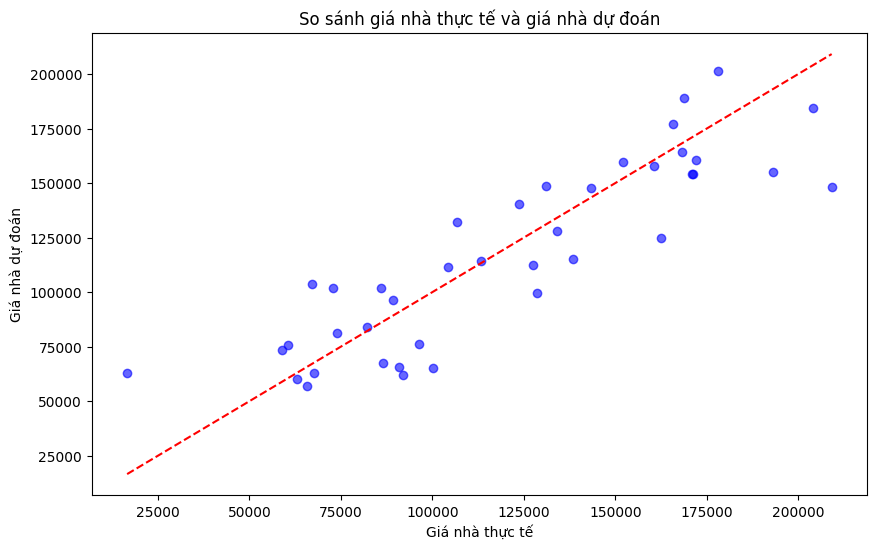

In [9]:
pipeline.fit(X_train, y_train)

# Dự đoán giá nhà trên tập kiểm tra
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình với MSE và RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

# Tạo đồ thị so sánh giá dự đoán và giá thực tế
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Giá nhà thực tế")
plt.ylabel("Giá nhà dự đoán")
plt.title("So sánh giá nhà thực tế và giá nhà dự đoán")
plt.show()